# Práctica 1

### Regresión lineal

##### Eladia Gómez Morales y Ana Martínez Sabiote

In [73]:
import time
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [74]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

### Ejercicio regresión 1 

In [75]:
def plot_H(theta0, theta1):
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

In [76]:
def f_coste(theta_0, theta_1, m):
    sum=0.0
    for i in range(m):
        sum = sum + (((theta_0 + theta_1 * X[i]) - Y[i])**2)
    return (sum/(2.0*m))

In [77]:
def gradientDescent(X, Y, alpha):
    theta_0 = theta_1 = 0
    for _ in range(1500):
        sum_0 = sum_1 = 0
        coste = f_coste(theta_0, theta_1, m)
        #print('Función de coste {} = {}'.format(_, coste))
        for i in range(m):
            sum_0 += (theta_0 + theta_1 * X[i]) - Y[i]
            sum_1 += ((theta_0 + theta_1 * X[i]) - Y[i]) * X[i]
        theta_0 = theta_0 - (alpha / m) * sum_0
        theta_1 = theta_1 - (alpha / m) * sum_1
        plt.plot(X, Y, "x")
        
    return theta_0, theta_1

In [78]:
def dataProcessing(datos):
    X = datos[:, :-1]
    np.shape(X)         # (97, 1)
    Y = datos[:, -1]
    np.shape(Y)         # (97,)
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    return X, Y, m, n

In [79]:
def coste_vec(X, Theta):   
    # añadimos una columna de 1's a la X
    X = np.hstack([np.ones([m, 1]), X])
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [80]:
def make_data(t0_range, t1_range, datos):
    step=0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    X, Y, m, n = dataProcessing(datos)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste_vec(X, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

Theta0 = -3.63029143940436, Theta1 = 1.166362350335582
Función h(x)=-3.63029143940436+1.166362350335582x
Función de coste 4.483388256587726


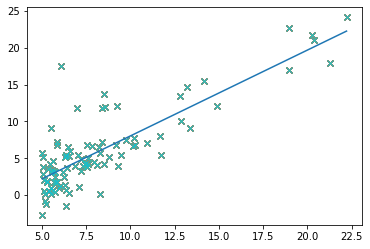

In [81]:
datos = carga_csv('ex1data1.csv')
X=datos[:,0]
Y=datos[:,1]
m=len(X)
alpha=0.01
theta0,theta1 = gradientDescent(X, Y, alpha)
plot_H(theta0, theta1)
print('Theta0 = {}, Theta1 = {}'.format(theta0, theta1))
print('Función h(x)={}+{}x'.format(theta0,theta1))
coste = f_coste(theta0, theta1, m)
print('Función de coste {}'.format(coste))


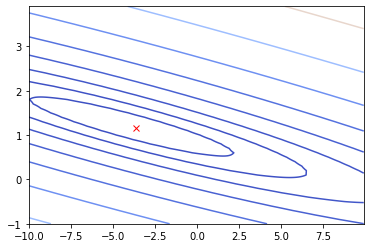

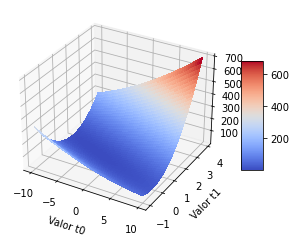

In [82]:
t0, t1, costes = make_data([-10, 10], [-1, 4], datos)

plt.figure()
plt.contour(t0, t1, costes, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.plot(theta0, theta1, 'x', color='red', label='Coste mínimo')
plt.savefig('Graf2d')


fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(t0, t1, costes, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel("Valor t0")
plt.ylabel("Valor t1")
plt.savefig('Graf3d')
fig.colorbar(surf, shrink=0.5, aspect=5)



### Ejercicio regresión 2

In [83]:
def normalizer(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [84]:
def gradiente_vec(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:,i]
        NuevaTheta[i] -= (alpha/m) * Aux_i.sum()
    return NuevaTheta

In [89]:
def gradientDescent_vec(X, Y, Theta, alpha):
    for _ in range(1500):
        coste[_] = coste_vec(X, Theta)
        #print('Función de coste {} = {}'.format(_, coste))
        Theta = gradiente_vec(X, Y, Theta, alpha)
        plt.plot(X, Y, "x")
    return Theta, coste

In [99]:
valores = carga_csv('ex1data2.csv')
X, Y, m, n = dataProcessing(valores)
X_norm, mu, sigma = normalizer(X)
alpha = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]
Theta = np.ones((m, n))
Theta = np.hstack([np.ones([m, 1]), X])
for i in alpha:
    ThetaFinal, coste = gradientDescent_vec(X_norm, Y, Theta, i)


ValueError: shapes (47,3) and (47,3) not aligned: 3 (dim 1) != 47 (dim 0)